## Import libraries

In [5]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tabulate import tabulate

## Import dataset

In [2]:
# Set dataset paths
train_dir = r'C:\Users\Dell\Documents\Projects\FaceExp\data\train'
test_dir = r'C:\Users\Dell\Documents\Projects\FaceExp\data\test'

## Exploring data

In [6]:
# Count the number of images in each class
def count_images(directory):
    class_counts = {}
    
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        
        image_count = len([img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))])
        class_counts[class_name] = image_count
    
    return class_counts

def print_table(train_counts, test_counts):
    classes = sorted(set(train_counts.keys()).union(set(test_counts.keys())))
    table_data = [[cls, train_counts.get(cls, 0), test_counts.get(cls, 0)] for cls in classes]
    print(tabulate(table_data, headers=["Class", "Train Count", "Test Count"], tablefmt="grid"))

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print_table(train_counts, test_counts)

+----------+---------------+--------------+
| Class    |   Train Count |   Test Count |
+==========+===============+==============+
| angry    |          3995 |          958 |
+----------+---------------+--------------+
| disgust  |           436 |          111 |
+----------+---------------+--------------+
| fear     |          4097 |         1024 |
+----------+---------------+--------------+
| happy    |          7215 |         1774 |
+----------+---------------+--------------+
| neutral  |          4965 |         1233 |
+----------+---------------+--------------+
| sad      |          4830 |         1247 |
+----------+---------------+--------------+
| surprise |          3171 |          831 |
+----------+---------------+--------------+


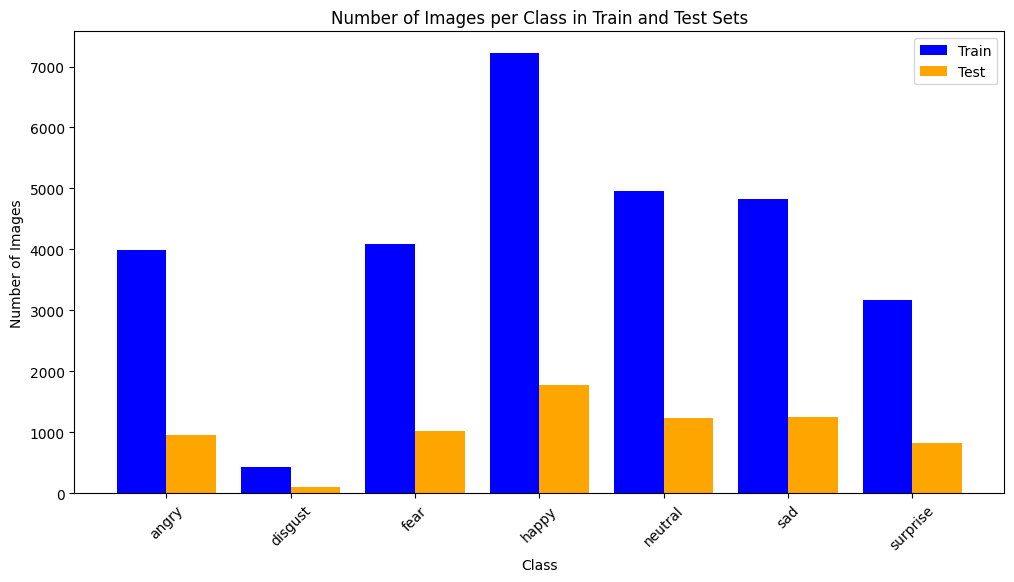

In [7]:
# Plot the class distribution
def plot_image_counts(train_counts, test_counts):
    classes = sorted(set(train_counts.keys()).union(set(test_counts.keys())))
    train_values = [train_counts.get(cls, 0) for cls in classes]
    test_values = [test_counts.get(cls, 0) for cls in classes]
    
    x = range(len(classes))
    
    plt.figure(figsize=(12, 6))
    plt.bar(x, train_values, width=0.4, label='Train', align='center', color='blue')
    plt.bar([i + 0.4 for i in x], test_values, width=0.4, label='Test', align='center', color='orange')
    
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class in Train and Test Sets')
    plt.xticks([i + 0.2 for i in x], classes, rotation=45)
    plt.legend()
    plt.show()

plot_image_counts(train_counts, test_counts)

## Preparing data for ResNet50

In [3]:
# Get image sizes
def get_image_sizes(directory):
    size_dict = {}
    
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        
        sizes = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    sizes.append(img.size)  # (width, height)
            except Exception as e:
                print(f"Error reading {img_path}: {e}")
        
        size_dict[class_name] = sizes
    
    return size_dict

In [ ]:
# Print the image sizes
def print_image_sizes(directory):
    sizes = get_image_sizes(directory)
    print(f"Image sizes in {directory}:")
    for class_name, size_list in sizes.items():
        if size_list:
            unique_sizes = set(size_list)
            print(f"  {class_name}: {len(size_list)} images, Unique sizes: {unique_sizes}")
        else:
            print(f"  {class_name}: No images found")

print_image_sizes(train_dir)
print_image_sizes(test_dir)

In [ ]:
#Resize the images according to ResNet50
def resize_images(directory, size=224):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img = img.resize((size, size), Image.LANCZOS)
                    img.save(img_path)
            except Exception as e:
                print(f"Error resizing {img_path}: {e}")

resize_images(train_dir)
resize_images(test_dir)